In [5]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('data.csv')
df.head()

,Date,Team1,Team2,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,28/03/2024,spirit,faze,0,4,79.2,1,72.4,1.03,0.63,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,28/03/2024,spirit,natus_vincere,1,4,79.2,2,77.3,1.03,0.63,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,28/03/2024,spirit,imperial,1,4,79.2,18,72.0,1.03,0.63,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,28/03/2024,spirit,cloud9,1,4,79.2,7,63.0,1.03,0.63,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,28/03/2024,spirit,metizport,1,4,79.2,30,62.0,1.03,0.63,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [7]:
df['Score'].value_counts()

Score
1    1296
0    1259
Name: count, dtype: int64

In [8]:
df = df.drop(['Team1', 'Team2', 'Date'], axis=1)
df.head()

,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,1,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,1,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,1,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [9]:
X = df.drop(['Score'], axis=1)
X.head()

,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,Team1_Player2_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,0.74,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [10]:
y = df['Score']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scalerFit = scaler.fit(X)

In [13]:
X = scalerFit.transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
model = Sequential([
    Dense(64, input_dim=44, activation='relu'),  # First hidden layer with input dimension 44
    Dropout(0.5),                                # Dropout for regularization
    Dense(32, activation='relu'),                # Additional hidden layer
    Dense(1, activation='sigmoid')               # Output layer for binary classification
])

c:\Projects\License\Models\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7707 - loss: 0.4390 - val_accuracy: 0.5770 - val_loss: 0.9148
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7729 - loss: 0.4346 - val_accuracy: 0.5746 - val_loss: 0.9154
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7881 - loss: 0.4341 - val_accuracy: 0.5868 - val_loss: 0.9098
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7873 - loss: 0.4214 - val_accuracy: 0.5697 - val_loss: 0.9169
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7903 - loss: 0.3997 - val_accuracy: 0.5599 - val_loss: 0.9186
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.4017 - val_accuracy: 0.5844 - val_loss: 0.9108
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7961 - loss: 0.4174 - val_accuracy: 0.5819 - val_loss: 0.9182
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7832 - loss: 0.4237 - val_accuracy: 0.5746 - v

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Test Loss: 1.2015506029129028, Test Accuracy: 0.5616438388824463


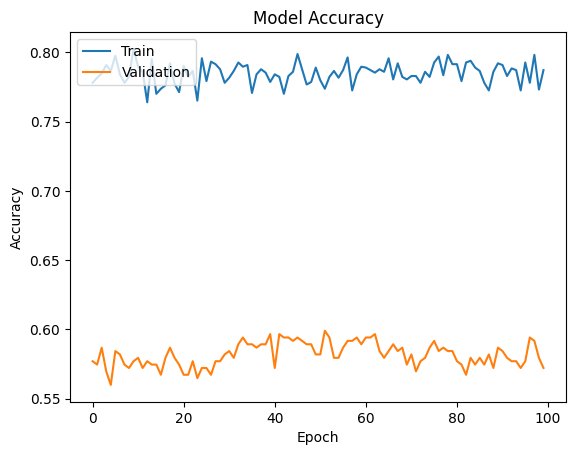

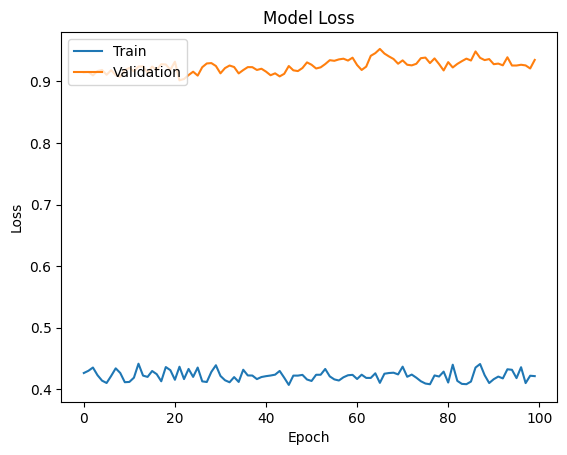

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
